# Import modules

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import pandas as pd

# Loading dataset

In [4]:
data=pd.read_csv('C:\\Users\\USER\\Desktop\\cld\\Cleaned_data.csv')
data.head(5)

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5,67,3,5,3,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,57,1,5,3,1
4,5,76,1,4,3,1


In [7]:
data.nunique()

BI-RADS      7
Age         72
Shape        4
Margin       5
Density      4
Severity     2
dtype: int64

In [8]:
data.shape

(830, 6)

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BI-RADS,830.0,4.393976,1.888371,0.0,4.0,4.0,5.0,55.0
Age,830.0,55.781928,14.671782,18.0,46.0,57.0,66.0,96.0
Shape,830.0,2.781928,1.242361,1.0,2.0,3.0,4.0,4.0
Margin,830.0,2.813253,1.567175,1.0,1.0,3.0,4.0,5.0
Density,830.0,2.915663,0.350936,1.0,3.0,3.0,3.0,4.0
Severity,830.0,0.485542,0.500092,0.0,0.0,0.0,1.0,1.0


In [13]:
data.isna().sum()

BI-RADS     0
Age         0
Shape       0
Margin      0
Density     0
Severity    0
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   BI-RADS   830 non-null    int64
 1   Age       830 non-null    int64
 2   Shape     830 non-null    int64
 3   Margin    830 non-null    int64
 4   Density   830 non-null    int64
 5   Severity  830 non-null    int64
dtypes: int64(6)
memory usage: 39.0 KB


# Data vizualisation

<AxesSubplot:xlabel='Shape', ylabel='Count'>

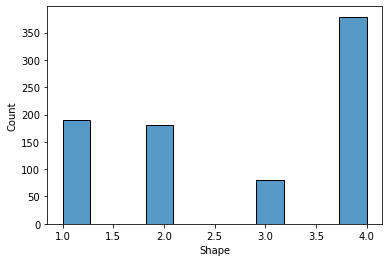

In [16]:
sns.histplot(data['Shape'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

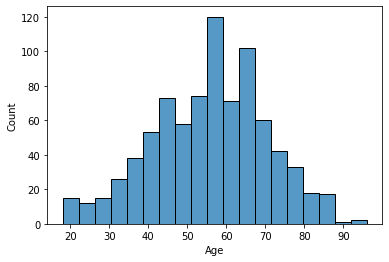

In [17]:
sns.histplot(data['Age'])

<AxesSubplot:xlabel='Density', ylabel='Count'>

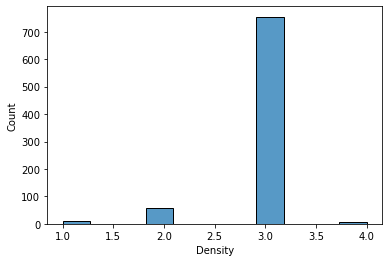

In [18]:
sns.histplot(data['Density'])

C:\Users\USER\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BI-RADS', ylabel='count'>

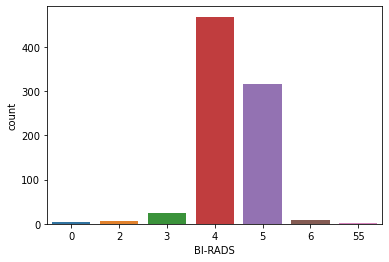

In [20]:
sns.countplot(data['BI-RADS'])

C:\Users\USER\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Margin', ylabel='count'>

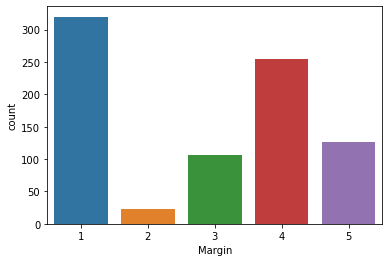

In [21]:
sns.countplot(data['Margin'])

C:\Users\USER\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Severity', ylabel='count'>

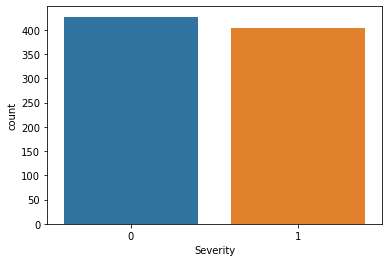

In [22]:
sns.countplot(data['Severity'])

# Correlation matrix

In [23]:
data.corr()

,BI-RADS,Age,Shape,Margin,Density,Severity
BI-RADS,1.000000,0.094623,0.180120,0.157771,0.028356,0.223826
Age,0.094623,1.000000,0.380096,0.420913,0.052417,0.455216
Shape,0.180120,0.380096,1.000000,0.738014,0.073969,0.564763
Margin,0.157771,0.420913,0.738014,1.000000,0.124860,0.574498
Density,0.028356,0.052417,0.073969,0.124860,1.000000,0.068651
Severity,0.223826,0.455216,0.564763,0.574498,0.068651,1.000000


<AxesSubplot:>

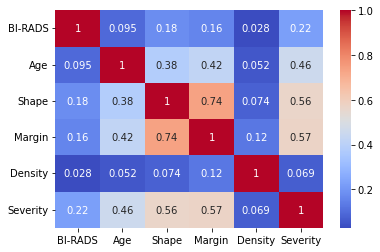

In [24]:
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

 # Train and Test

In [25]:
X = data.drop(['BI-RADS'], axis=1)
y = data['BI-RADS']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [26]:
X

,Age,Shape,Margin,Density,Severity
0,67,3,5,3,1
1,58,4,5,3,1
2,28,1,1,3,0
3,57,1,5,3,1
4,76,1,4,3,1
...,...,...,...,...,...
825,47,2,1,3,0
826,56,4,5,3,1
827,64,4,5,3,0
828,66,4,5,3,1


In [27]:
y

0      5
1      5
2      4
3      5
4      5
      ..
825    4
826    4
827    4
828    5
829    4
Name: BI-RADS, Length: 830, dtype: int64

In [28]:
X_train.shape, X_test.shape

((556, 5), (274, 5))

In [29]:
X_train.dtypes

Age         int64
Shape       int64
Margin      int64
Density     int64
Severity    int64
dtype: object

In [32]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Model accuracy score with criterion gini index: 0.7920
Training-set accuracy score: 0.8022


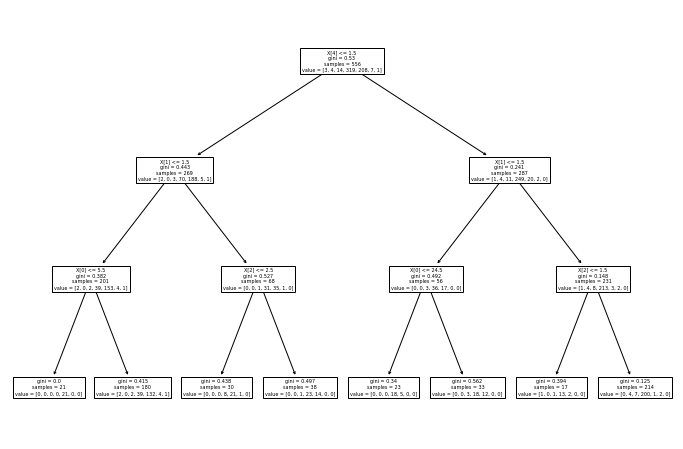

In [35]:
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(X_train, y_train)) 
plt.show()

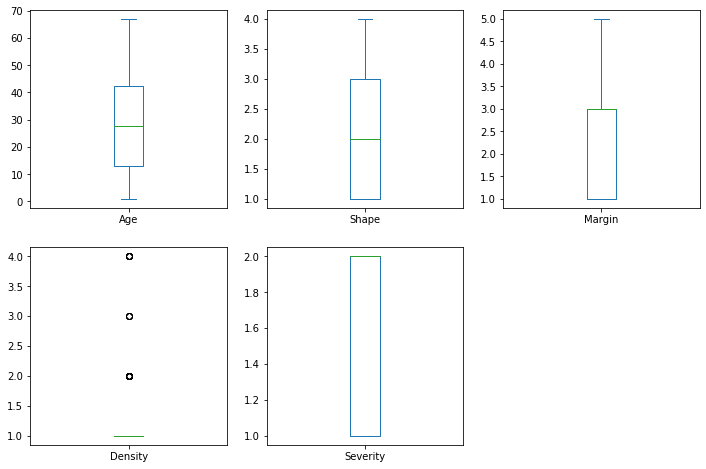

In [36]:
X_train.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False, figsize=(12,8))
plt.show()

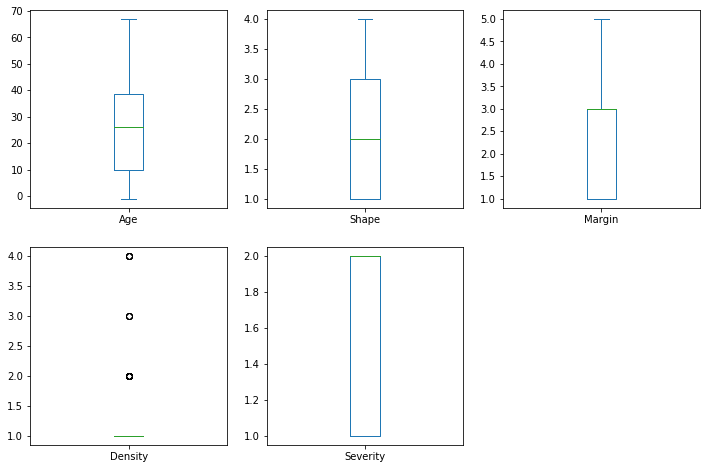

In [37]:
X_test.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False,  figsize=(12,8))
plt.show()

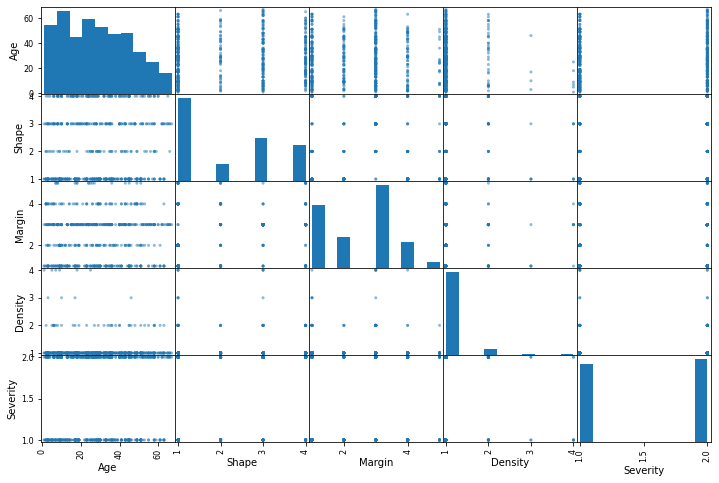

In [38]:
from pandas.plotting import scatter_matrix
scatter_matrix(X_train, figsize=(12,8))
plt.show()

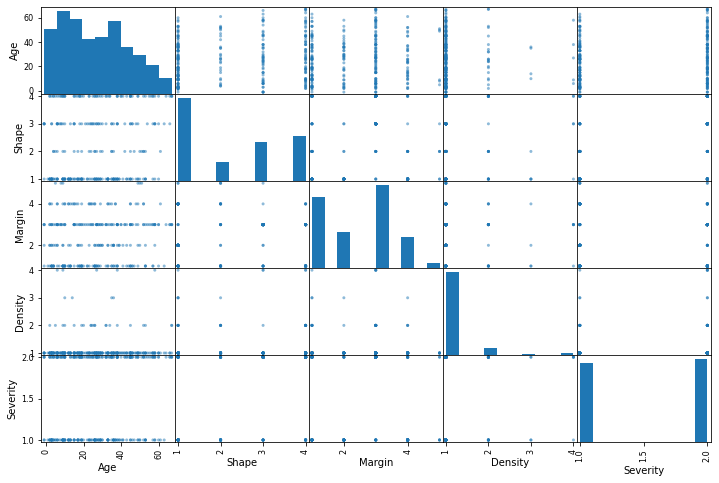

In [39]:
from pandas.plotting import scatter_matrix
scatter_matrix(X_test, figsize=(12,8))
plt.show()

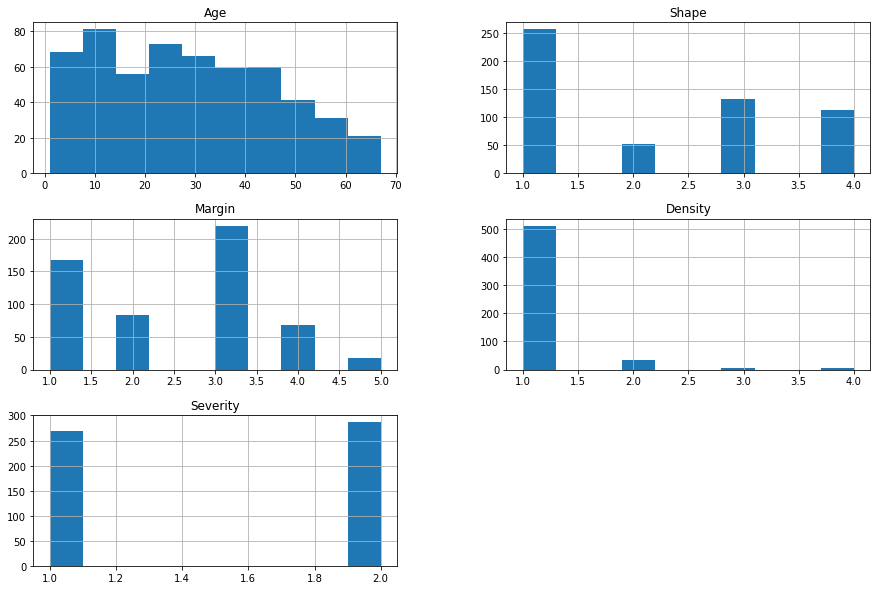

In [40]:
X_train.hist(figsize=(15,10))
plt.show()

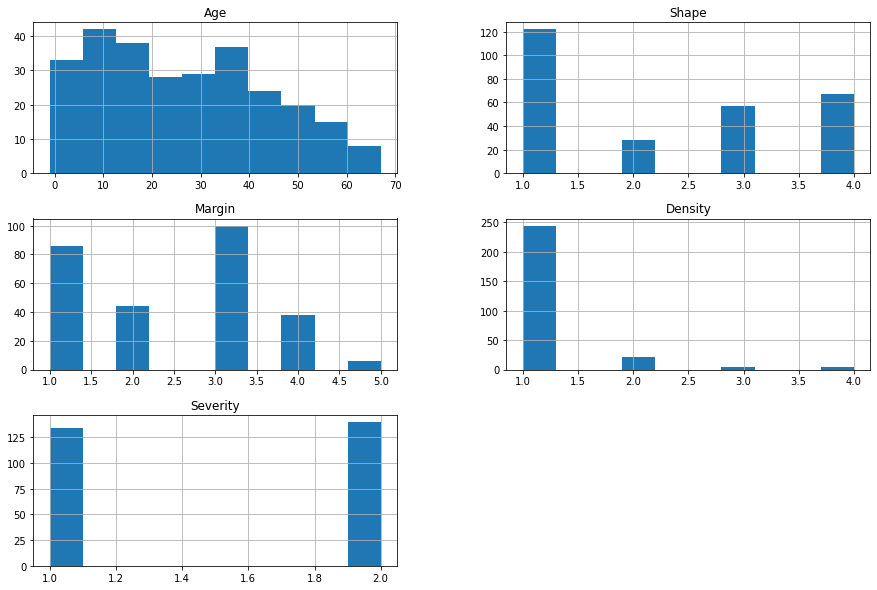

In [41]:
X_test.hist(figsize=(15,10))
plt.show()

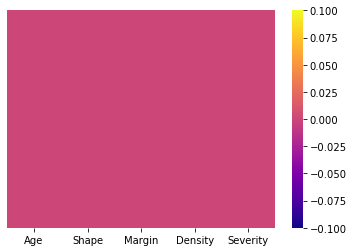

In [42]:
sns.heatmap(X_train.isnull(), yticklabels = False, cmap = "plasma")
plt.show()

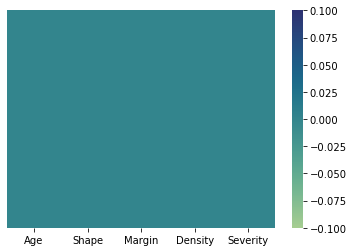

In [44]:
sns.heatmap(X_test.isnull(), yticklabels = False, cmap = "crest")
plt.show()

In [45]:
# instantiate the DecisionTreeClassifier model with criterion entropy
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
# fit the model
clf_en.fit(X_train, y_train)
y_pred_en = clf_en.predict(X_test)
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))
y_pred_train_en = clf_en.predict(X_train)
y_pred_train_en
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Model accuracy score with criterion entropy: 0.7956
Training-set accuracy score: 0.8004


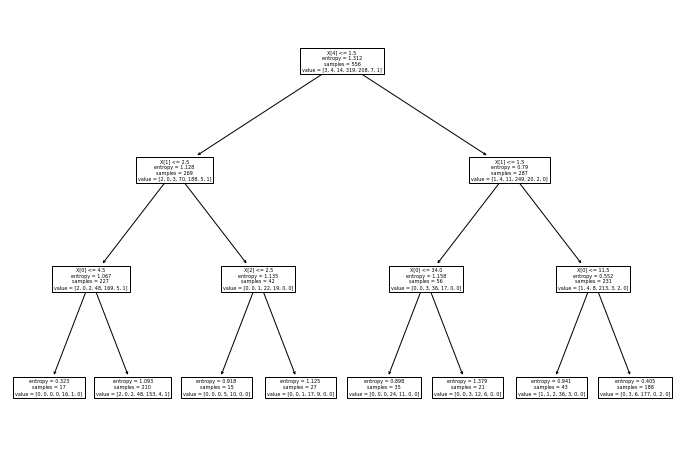

In [46]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_en.fit(X_train, y_train)) 
plt.show()

In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_en)

array([[  0,   0,   0,   1,   1,   0],
       [  0,   0,   0,   3,   0,   0],
       [  0,   0,   0,  10,   0,   0],
       [  0,   0,   0, 122,  27,   0],
       [  0,   0,   0,  12,  96,   0],
       [  0,   0,   0,   0,   2,   0]], dtype=int64)

In [48]:
if accuracy_score(y_test, y_pred_gini) > accuracy_score(y_train, y_pred_train_en):
   print("Gini Index Criterion is Better and it has accuracy equal to ", accuracy_score(y_test, y_pred_gini)*100) 
else:
    print("Entropy Criterion is Better and it has accuracy equal to ", accuracy_score(y_train, y_pred_train_en)*100)

Entropy Criterion is Better and it has accuracy equal to  80.03597122302159
